In [1]:
import pandas as pd

from util.performance import plot_moderation_performance
from tqdm import tqdm
from kneed import DataGenerator, KneeLocator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# load df
names = ['BERT_BL', 'BERT_MCD', 'BERT_EN']
label = ['DistilBERT-BL', 'DistilBERT-MCD', 'DistilBERT-EN']
colours = ['b', 'r', 'g']

dfs_all = []
for name in names:
    dfs = []
    for i in range(5):
        df = pd.read_pickle(f"../pickle/toxic/df_{name}_{i}.pkl")
        dfs.append(df)
        i = i+1
    dfs_all.append(dfs)

In [3]:
plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)

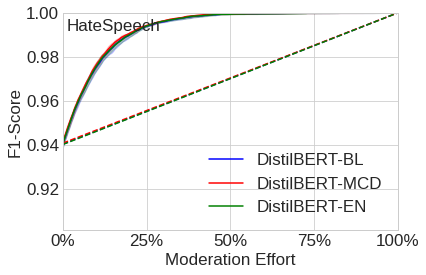

In [4]:
for i in range(len(dfs_all)):
    plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro')
    
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1 , 2]
plt.legend([handles[idx] for idx in order],[label[idx] for idx in order], loc='lower right')



plt.xticks([0, .25, .50, .75, 1], ['0%', '25%', '50%', '75%', '100%'])
plt.yticks([0.88, .9, .92, .94, .96, .98, 1], ['0.88', '0.90', '0.92', '0.94', '0.96', '0.98', '1.00'])

plt.xlim((0, 1))
plt.ylim((0.901, 1))

plt.xlabel('Moderation Effort')
plt.ylabel('F1-Score')
plt.text(0.01, .992, 'HateSpeech')

plt.savefig('bert_toxic_y.pdf', bbox_inches='tight')

100%|██████████| 3/3 [00:00<00:00, 24.93it/s]



BERT_BL
Effort (%):  0.245
F1_Score  :  0.9936399999999999

BERT_MCD
Effort (%):  0.239
F1_Score  :  0.99372

BERT_EN
Effort (%):  0.245
F1_Score  :  0.9937000000000001


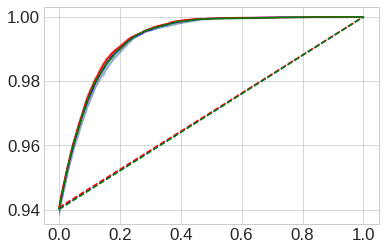

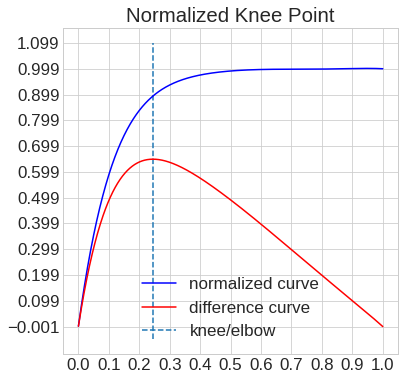

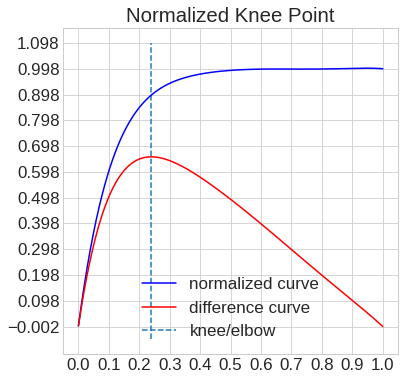

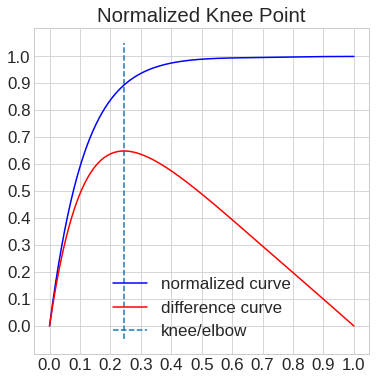

In [5]:
# Knee LC

values = []

for i in tqdm(range(len(dfs_all))):
    a, b = plot_moderation_performance(dfs_all[i], 'u_lc', names[i], colours[i], average='micro', eps=1000)
    values.append((a, b))

i = 0
for (a, b) in tqdm(values):
    x = a
    y = b.values
    kneedle = KneeLocator(x, y, S=1, curve='concave', direction='increasing', interp_method="polynomial")
    
    print('\n' + names[i])
    print('Effort (%): ', round(kneedle.knee, 3))
    print('F1_Score  : ', y[int(kneedle.knee*1000)])
    kneedle.plot_knee_normalized()
    i+= 1